In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Telco Customer Churn dataset
telecom = pd.read_csv('Telco-Customer-Churn.csv')


In [14]:
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
telecom.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [16]:
# Checking the data types of all the columns
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
# Converting Total Charges to a numerical data type.
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges, errors='coerce')
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#Removing missing values 
telecom.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = telecom.iloc[:,1:]

#Converting the predictor variable into binary
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot: >

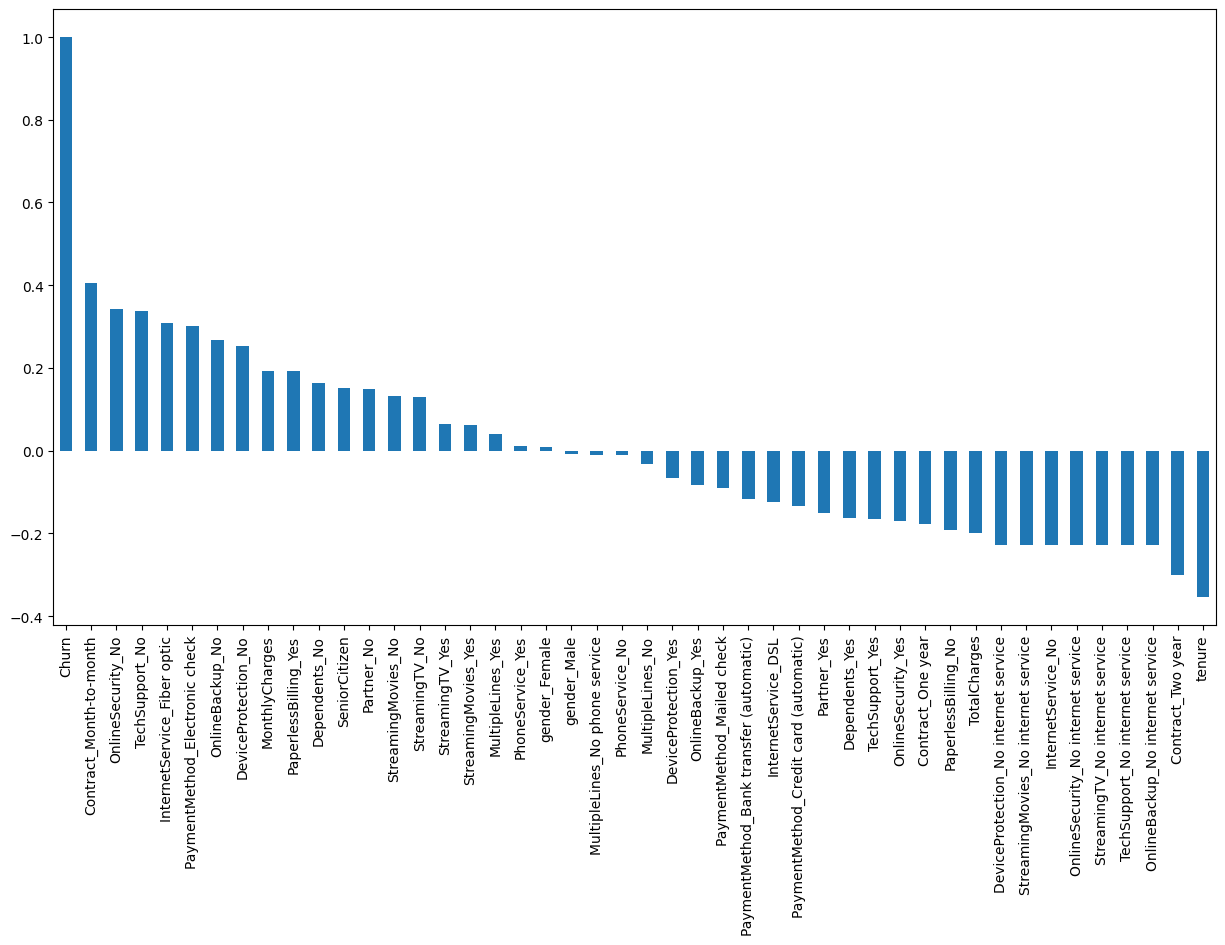

In [21]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Gender Distribution

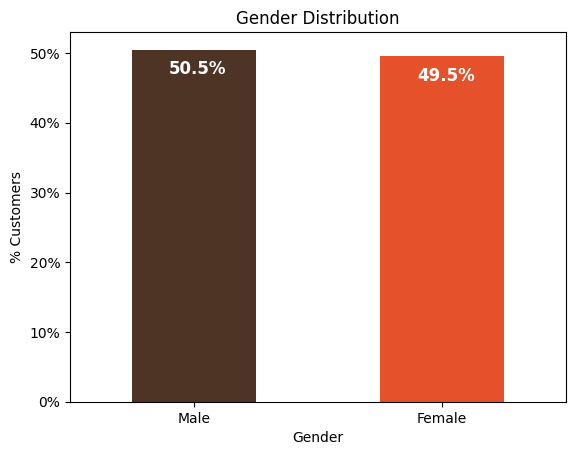

In [22]:
colors = ['#4D3425','#E4512B']
ax = (telecom['gender'].value_counts()*100.0 /len(telecom)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

About half of the customers in our data set are male while the other half are female

## Senior Citizens

Text(0.5, 1.0, '% of Senior Citizens')

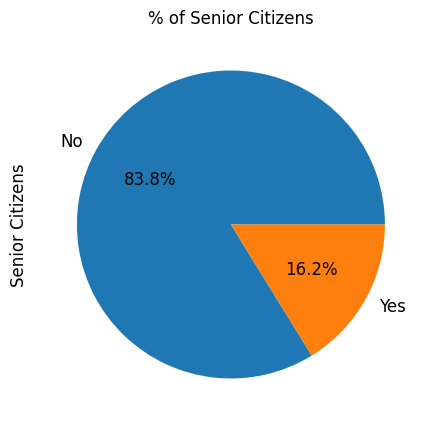

In [23]:
ax = (telecom['SeniorCitizen'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

# LOGISTIC REGRESSION

In [24]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [25]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [26]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Evaluate the default model
accuracy = accuracy_score(y_test, prediction_test)
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
confusion = confusion_matrix(y_test, prediction_test)

print("Default Logistic Regression Model:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(confusion)

Default Logistic Regression Model:
Accuracy: 0.8075829383886256
Precision: 0.6383928571428571
Recall: 0.539622641509434
F1-Score: 0.5848670756646217
Confusion Matrix:
[[1418  162]
 [ 244  286]]


The values obtained from the evaluation of the default logistic regression model are as follows:

#### Accuracy: 0.8075829383886256
Accuracy represents the proportion of correctly predicted outcomes (both true positives and true negatives) out of the total number of instances. In this case, the model achieved an accuracy of approximately 80.76%, indicating that it correctly predicted the churn status (churned or not churned) for about 80.76% of the customers in the test set.

#### Precision: 0.6383928571428571
Precision is the ratio of true positives (correctly predicted churned customers) to the total number of predicted positives (both true positives and false positives). A precision of approximately 63.84% means that out of all the customers predicted as churned, around 63.84% were actually churned.

#### Recall: 0.539622641509434
Recall, also known as sensitivity or true positive rate, is the ratio of true positives to the total number of actual positives (both true positives and false negatives). The recall value of approximately 53.96% indicates that the model identified around 53.96% of the churned customers correctly.

#### F1-Score: 0.5848670756646217
The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. The F1-score obtained, approximately 0.5849, indicates the overall performance of the model in terms of both precision and recall.

#### Confusion Matrix:
[[1418  162]
 [ 244  286]]
The confusion matrix is a table that summarizes the performance of a classification model. It provides information about the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. In this case, the confusion matrix shows the following:
- 1418 instances were correctly predicted as not churned (true negatives)
- 162 instances were incorrectly predicted as churned (false positives)
- 244 instances were incorrectly predicted as not churned (false negatives)
- 286 instances were correctly predicted as churned (true positives)


# PART II

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'class_weight': ['balanced', None]
}

In [39]:
# Create the logistic regression model
# using max_iter=1000 because it allows the model to perform more iterations and increase the chances of convergence. 
# model had failed to  converge before
model = LogisticRegression(max_iter=1000)



# Create the GridSearchCV object with the defined parameters
grid_search = GridSearchCV(model, param_grid, scoring='recall_macro', cv=3, error_score='raise')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best-tuned model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


## Tuned Model Evaluation:

In [41]:
# Fit the tuned logistic regression model using GridSearchCV
tuned_model = grid_search.best_estimator_
tuned_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tuned = tuned_model.predict(X_test)

# Calculate evaluation metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

# Generate confusion matrix
confusion_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

# Print evaluation metrics and confusion matrix
print("Tuned Model Metrics:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-Score:", f1_tuned)
print("Confusion Matrix:")
print(confusion_matrix_tuned)

Tuned Model Metrics:
Accuracy: 0.7464454976303317
Precision: 0.49696233292831105
Recall: 0.7716981132075472
F1-Score: 0.6045824094604584
Confusion Matrix:
[[1166  414]
 [ 121  409]]


# PART III

Best Hyperparameters:
{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

1. 'C': 1
   - The 'C' parameter controls the inverse of the regularization strength in logistic regression. It determines how much the model is penalized for having large coefficients. A smaller value of 'C' indicates stronger regularization, meaning that the model will have smaller coefficients and potentially higher bias. Conversely, a larger value of 'C' reduces the strength of regularization, allowing the model to fit the training data more closely. In this case, the best-tuned model had a 'C' value of 1, indicating a moderate regularization strength.

2. 'class_weight': 'balanced'
   - The 'class_weight' parameter allows us to handle class imbalance in the dataset. In logistic regression, it assigns weights to the classes to account for the unequal distribution of the target variable. The 'balanced' option automatically adjusts the weights inversely proportional to the class frequencies in the input data. This helps prevent the model from being biased towards the majority class and can improve performance in imbalanced datasets. Using 'balanced' as the value for 'class_weight' ensures that the model gives equal consideration to both classes.

3. 'penalty': 'l2'
   - The 'penalty' parameter specifies the type of regularization penalty applied in logistic regression. Regularization helps prevent overfitting by adding a penalty term to the loss function. In logistic regression, we have two options for the penalty: 'l1' (L1 regularization or Lasso) and 'l2' (L2 regularization or Ridge). 'l1' regularization encourages the model to have sparse coefficients, effectively performing feature selection. 'l2' regularization encourages the model to have small and smooth coefficients. In this case, 'l2' was chosen as the best regularization penalty for the logistic regression model.

4. 'solver': 'liblinear'
   - The 'solver' parameter determines the algorithm used for optimization in logistic regression. Different solvers employ different numerical algorithms to find the optimal solution for the logistic regression problem. The 'liblinear' solver is a good choice for small-to-medium-sized datasets. It supports both L1 and L2 penalties and is efficient for binary classification problems. The 'liblinear' solver works well with the 'l1' and 'l2' penalties, making it suitable for this configuration.
